### Imports and General Data

In [1]:
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from preprocessing import create_connection, get_files
from main import get_files, get_data, export_data
(root, data_path, presidents, cities, countries, years, colors) = get_data()
timeframe = ('2018-08-01', '2022-07-31')

# Aggregated Daily Sentiment

In [13]:
data = pd.read_pickle(f'{data_path}ai-generated/trump.csv.pkl')

In [15]:
data['Compound'].mean()

-0.046117833208663805

In [2]:
# trump = pd.read_pickle(f'{data_path}trump.pkl')
# johnson = pd.read_pickle(f'{data_path}johnson.pkl')
# trump.shape, johnson.shape
# trump.columns
# trump.drop(columns=[])

In [3]:
# trump = pd.read_pickle(f'{data_path}ai-generated/trump.csv.pkl')

In [4]:
def add_day_and_get_daily_sentiment(data):
    # Group the data by day and calculate the average 'Compound' value
    # convert to datetime
    data['created_at'] = pd.to_datetime(data['created_at'])
    data['day'] = data['created_at'].dt.date
    daily_sentiment = data.groupby('day')['Compound'].mean().reset_index()
    return data, daily_sentiment

In [5]:
def get_compound_mean(data):
    assert 'Compound' in data.columns
    return data['Compound'].mean()

In [6]:
def plot_sentiment_with_highlights_and_timeframes(daily_sentiment, title, significant_points=None, timeframe=None, colors=None, average_compound=None, save_path=None):
    # Set the figure size
    plt.figure(figsize=(15, 8))

    # Use Seaborn to plot the line graph for the daily average compound sentiment
    sns.lineplot(x='day', y='Compound', data=daily_sentiment, color=colors[1])

    # Highlighting significant points
    if significant_points:
        for point in significant_points:
            point_date = pd.to_datetime(point).date()
            if point_date in daily_sentiment['day'].values:
                plt.scatter(point_date, daily_sentiment.loc[daily_sentiment['day'] == point_date, 'Compound'], color=colors[0], s=100, edgecolor='black', zorder=5)

    # Highlighting the specific timeframe with a lighter background color
    if timeframe:
        plt.axvspan(pd.to_datetime(timeframe[0]).date(), pd.to_datetime(timeframe[1]).date(), color=colors[0], alpha=0.3)

    # Adding a horizontal line at compound sentiment score of 0 for reference
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)

    if average_compound:
        plt.axhline(average_compound, color='black', linestyle='--', linewidth=2, label=f'Average Compound ({average_compound:.2f})')
        
        # Calculate a small offset to move the label above or below the line
        offset = (daily_sentiment['Compound'].max() - daily_sentiment['Compound'].min()) * 0.02  # 2% of the range for offset
        
        # Add the offset to the average_compound value for the y coordinate of the text label
        plt.text(daily_sentiment['day'].max(), average_compound + offset, f' {average_compound:.2f}', 
                 verticalalignment='bottom', horizontalalignment='right', color='black', fontsize=10)


    # Set title and labels with Seaborn's default font
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Compound Sentiment Score')

    # Use Seaborn's default settings for ticks
    sns.despine()  # Remove the top and right spines

    plt.legend()
    plt.tight_layout()  # Adjust layout

    # Save the figure to a file if a save path is provided
    if save_path:
        plt.savefig(save_path, format='png', bbox_inches='tight')

    plt.show()

In [8]:
def visualize_daily_sentiment(filepath, title, significant_points=None):
    data =  pd.read_pickle(filepath)
    data, daily_sentiment = add_day_and_get_daily_sentiment(data)
    average_compound = get_compound_mean(data)
    if significant_points:
        significant_points = [pd.to_datetime(significant_points).date()]
    plot_sentiment_with_highlights_and_timeframes(daily_sentiment,
                                              title,
                                              significant_points=significant_points,
                                              colors=colors,
                                              average_compound=average_compound)

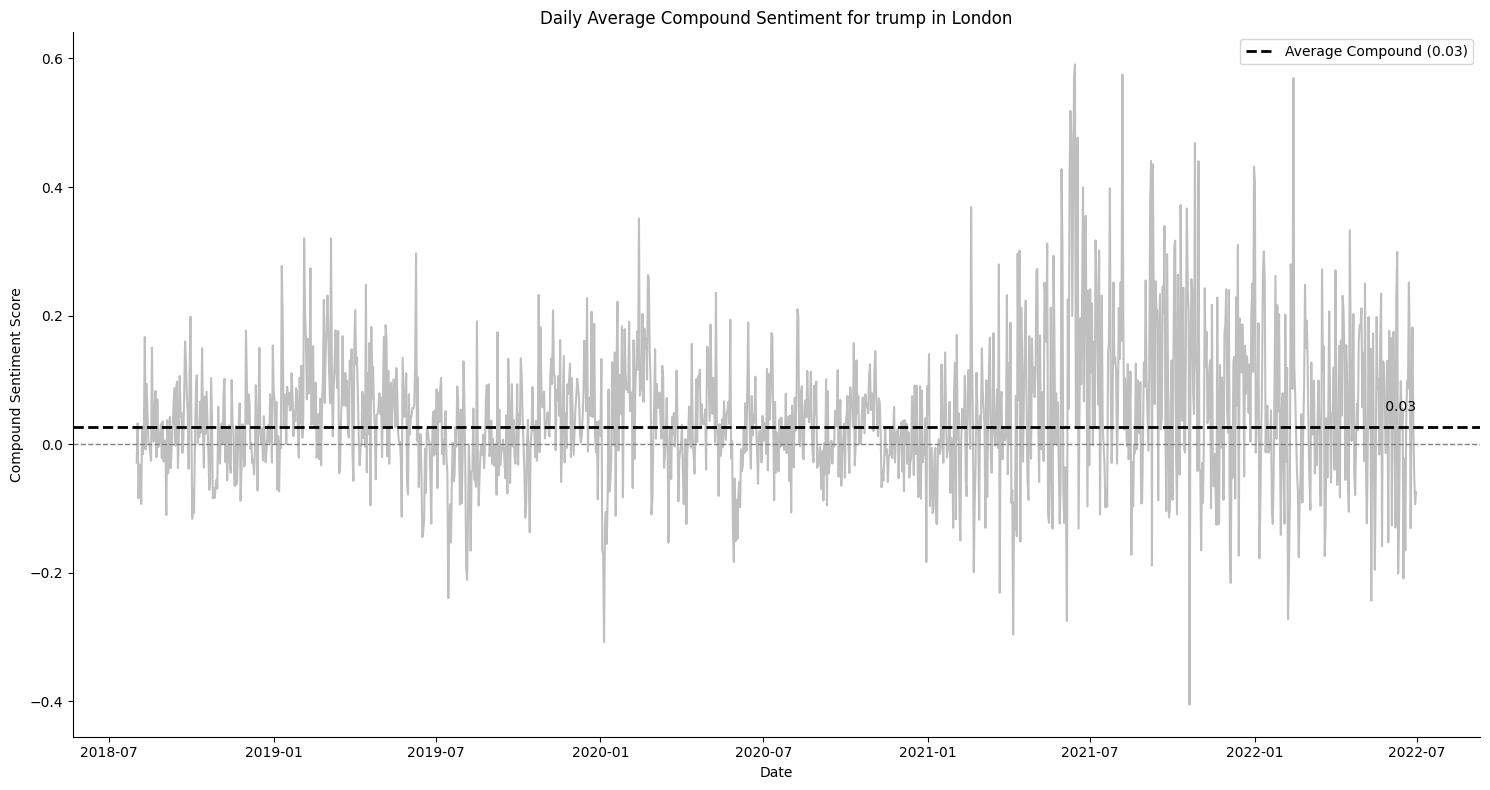

In [10]:
city = cities [2]
president = presidents[0]
visualize_daily_sentiment(f'{data_path}ai-generated/{president}-{city}.csv.pkl', f'Daily Average Compound Sentiment for {president.capitalize()} in {city}', save_path=f'visualizations/{president}-{city}.png')

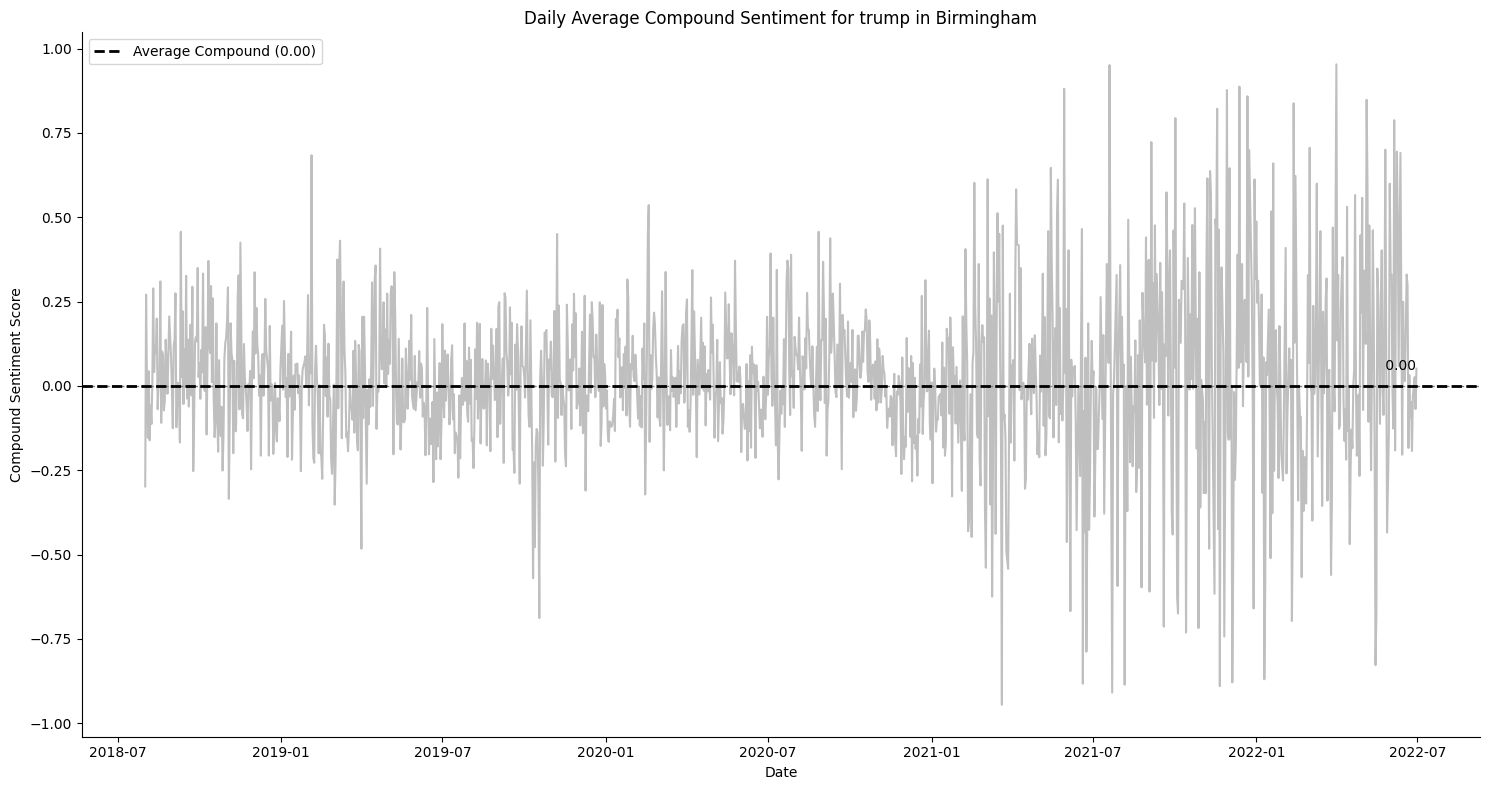

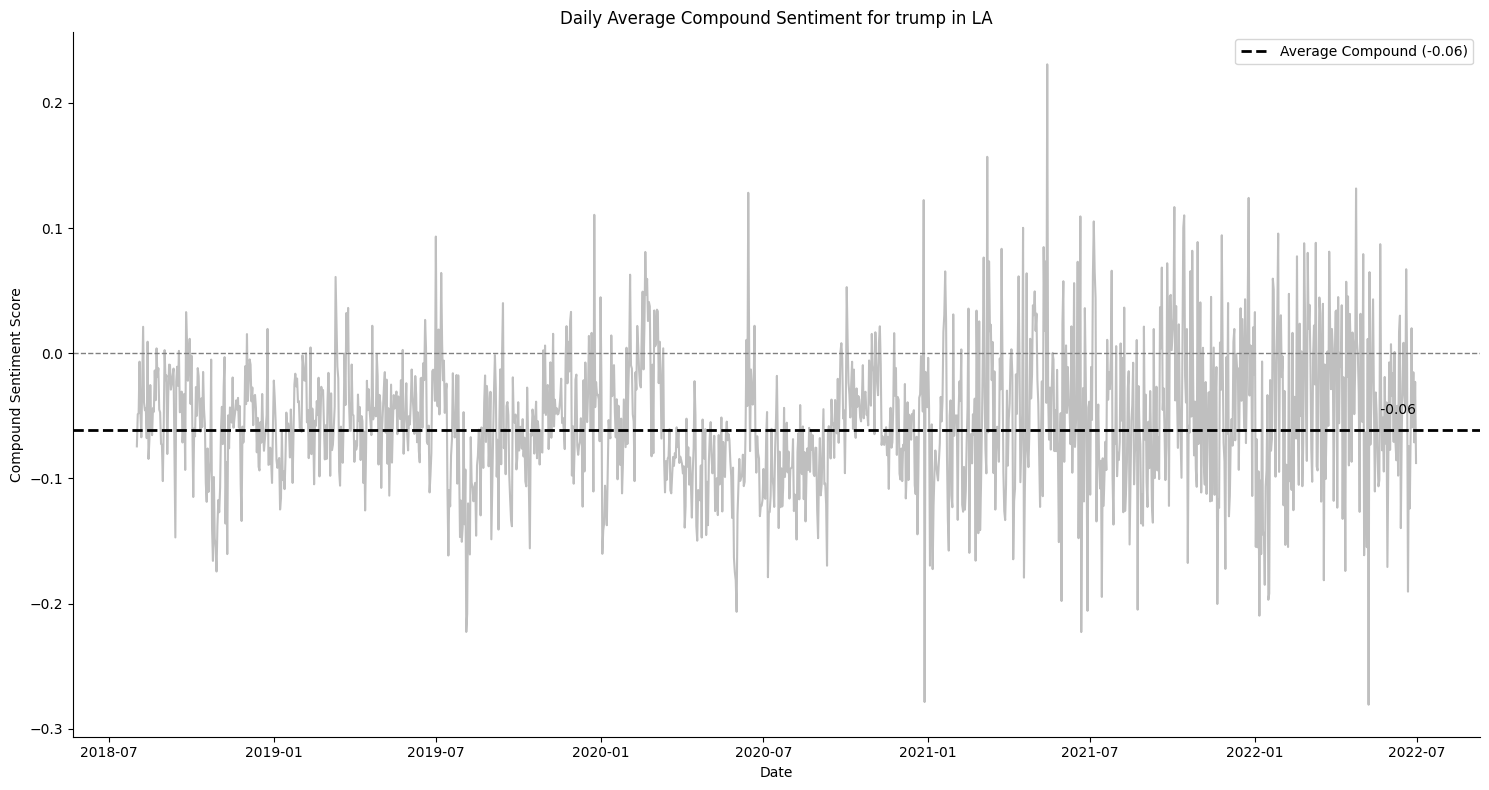

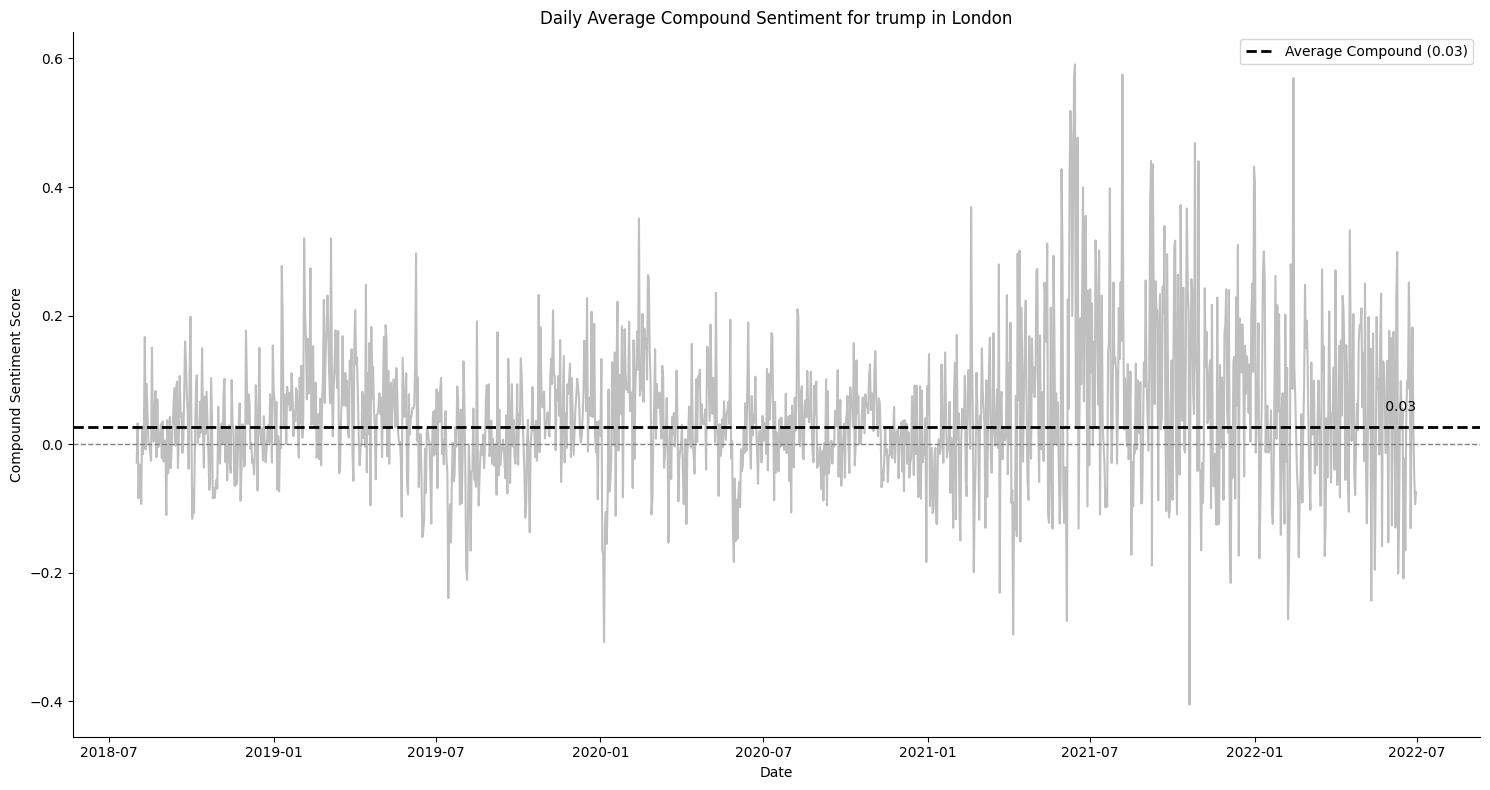

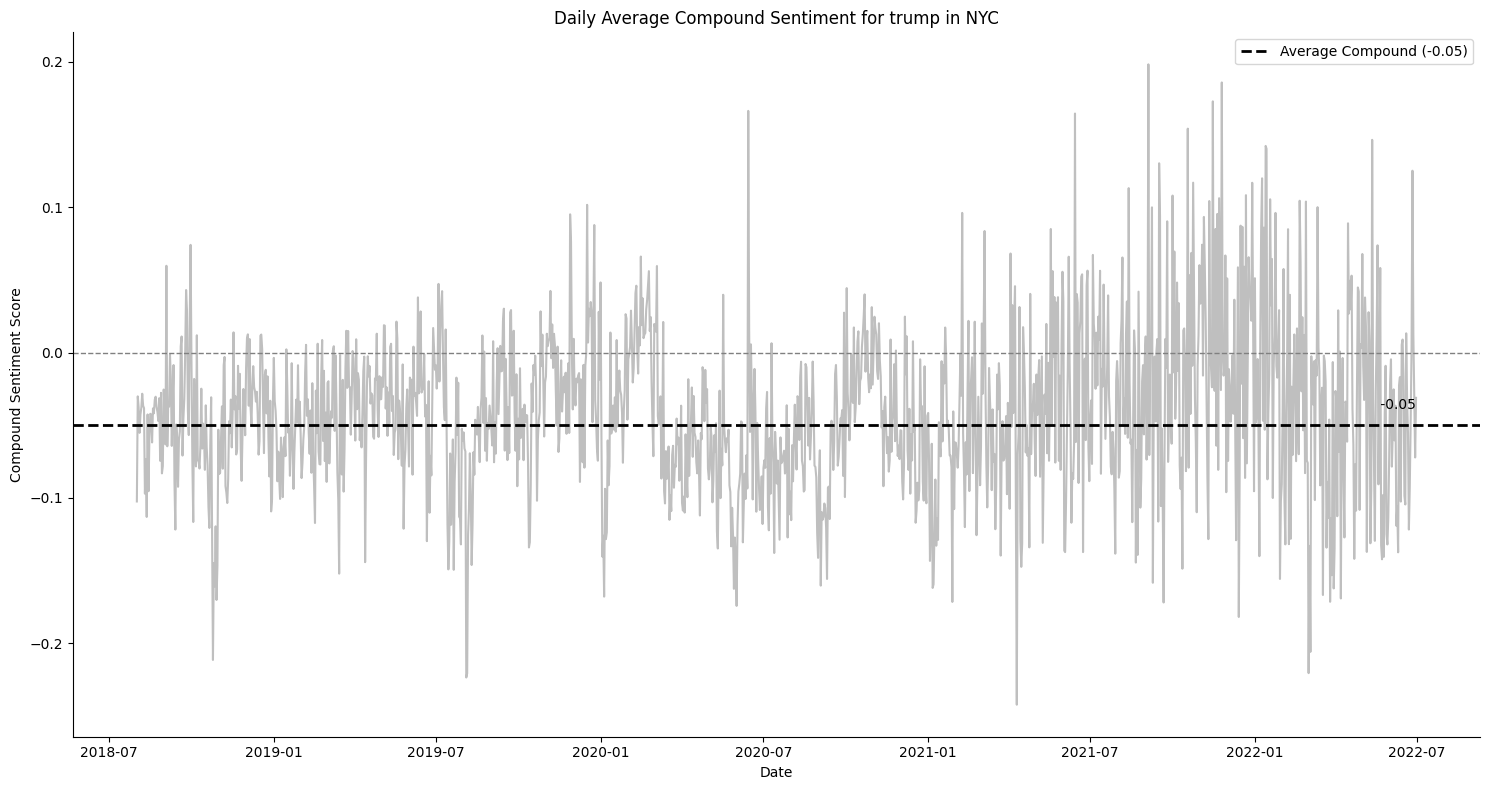

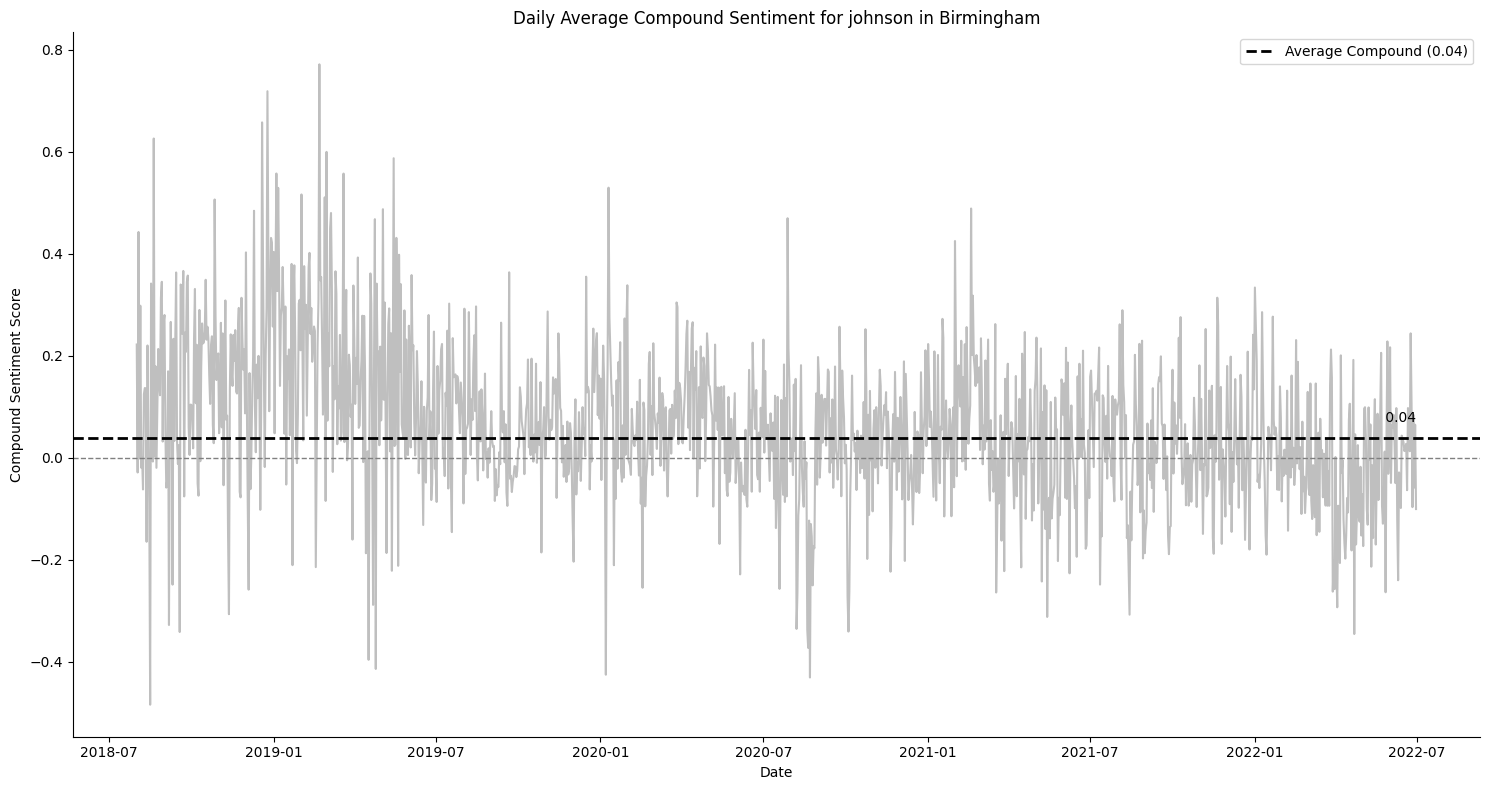

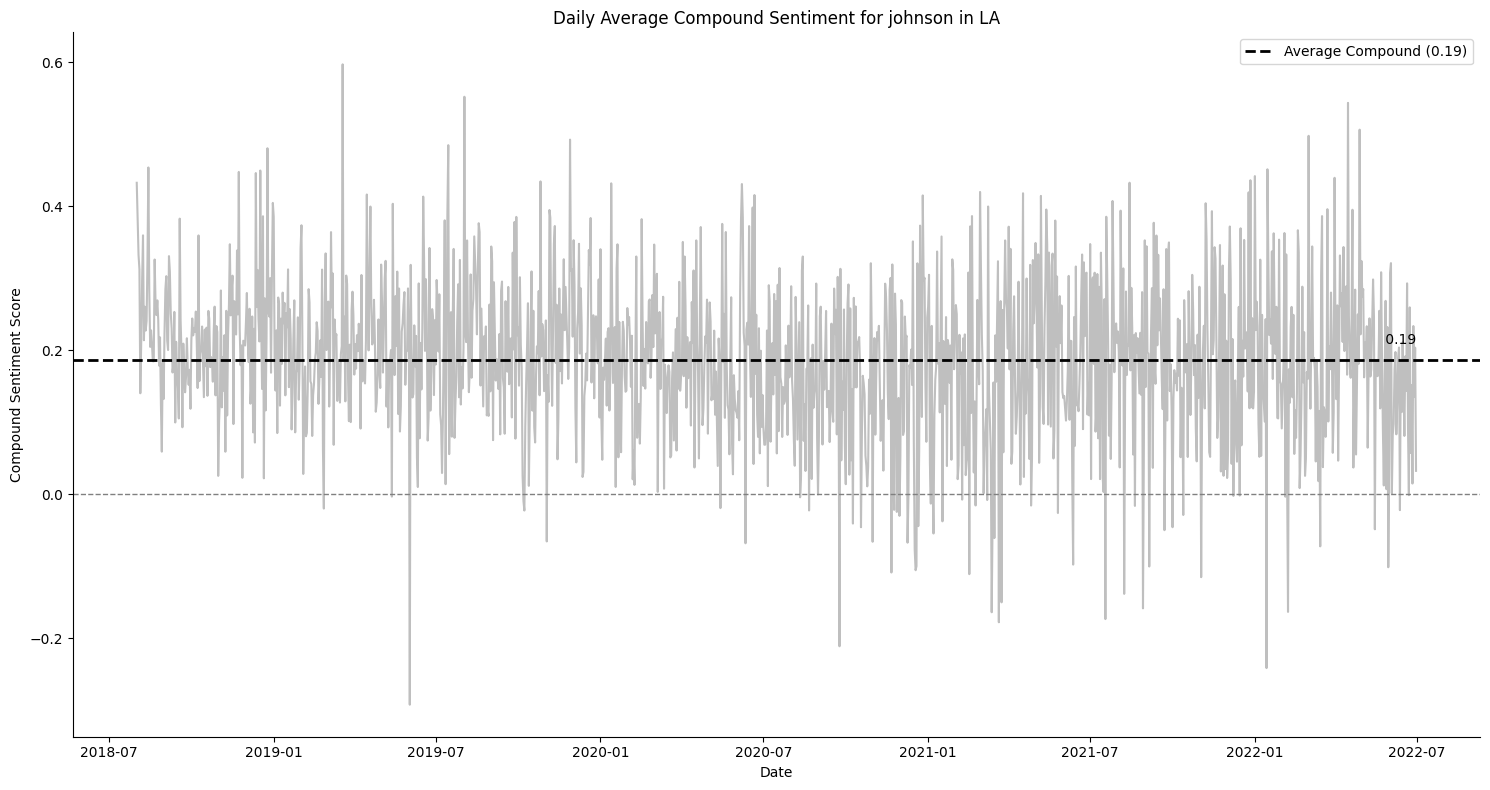

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Festplatte/data-UA/data/ai-generated/johnson-London.csv.pkl'

In [11]:
for president in presidents:
    for city in cities:
        title = f'Daily Average Compound Sentiment for {president} in {city}'
        filepath = f'{data_path}ai-generated/{president}-{city}.csv.pkl'
        visualize_daily_sentiment(filepath, title)

In [ ]:
# we need the city average for all data (not just president) => seperate sql statement & save variable in main or a separate file - do the same with countries